### Bibliotecas utilizadas

In [1]:
import matplotlib.pyplot as plt
import src.retrieveData as etl
from src.returnAnalysis import *
from src.best_fit import *
import pandas as pd

          date     ibov  tots3
240 2020-03-16   71.168  16.32
239 2020-03-17   74.617  16.69
238 2020-03-18   66.895  14.13
237 2020-03-19   68.332  13.88
236 2020-03-20   67.069  14.41
..         ...      ...    ...
4   2021-03-01  110.335  31.48
3   2021-03-02  111.540  31.02
2   2021-03-03  111.184  30.93
1   2021-03-04  112.690  30.61
0   2021-03-05  115.202  30.12

[241 rows x 3 columns]


### Carregando e plotando dados

<AxesSubplot:xlabel='date'>

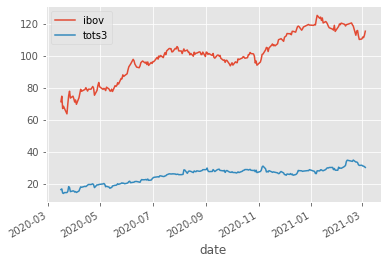

In [2]:
%matplotlib inline
# Recovering data
df = etl.get_data_from_csv("../ativos/")
df.plot(x="date", y=["ibov", "tots3"])

In [3]:
df.head()

,date,ibov,tots3
240,2020-03-16,71.168,16.32
239,2020-03-17,74.617,16.69
238,2020-03-18,66.895,14.13
237,2020-03-19,68.332,13.88
236,2020-03-20,67.069,14.41


### Plotar log return

<AxesSubplot:ylabel='Frequency'>

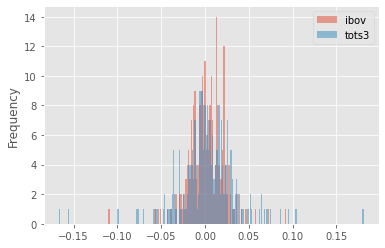

In [4]:
# 1.a) Getting log return dataframe
log_ret = generate_log_return(df)
log_ret.plot.hist(alpha=0.5, bins=len(log_ret))

In [4]:
log_ret.head()

,ibov,tots3
240,0.000000,0.000000
239,0.047325,0.022418
238,-0.109244,-0.166510
237,0.021254,-0.017851
236,-0.018656,0.037473


### Comparação da distribuição normal com os retornos dos ativos avaliados

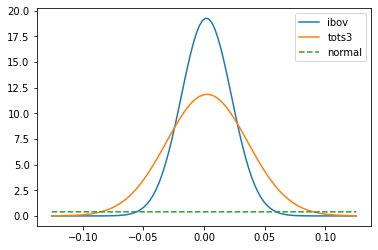

In [9]:
# 1.d) Normal Distribution simulation with returns
# ptrim = 0.01: Shows the "entire" normal distribution
# ptrim = 0.45: Shows the assets distribution much better
ptrim = 0.45
x_axis = np.linspace(st.norm.ppf(ptrim), st.norm.ppf(1-ptrim), 100)
plt.plot(x_axis, normal_simulation(log_ret, ptrim))
plt.plot(x_axis, st.norm.pdf(x_axis), '--')
plt.legend(["ibov", "tots3", "normal"])

### Intervalos de confiança

In [10]:
# 1.e) Confidence Interval of returns
ibov_ci_95 = confidence_interval(log_ret["ibov"], 0.05)
ibov_ci_99 = confidence_interval(log_ret["ibov"], 0.01)
tots3_ci_95 = confidence_interval(log_ret["tots3"], 0.05)
tots3_ci_99 = confidence_interval(log_ret["tots3"], 0.01)
print("IC 95%:")
print(" - IBOV: ", ibov_ci_95)
print(" - TOTS3:", tots3_ci_95)
print("IC 99%:")
print(" - IBOV: ", ibov_ci_99)
print(" - TOTS3:", tots3_ci_99)

IC 95%:
 - IBOV:  (0.0007009308578945393, 0.0032961133747538875)
 - TOTS3: (0.00043174036601635124, 0.004653720658014619)
IC 99%:
 - IBOV:  (0.0017391670512913178, 0.0022578771813571087)
 - TOTS3: (0.002120797963500956, 0.0029646630605300135)


### Teste de hipótese

In [27]:
# 1.f) Hypothesis test
print("Return 10% (alpha = 99%):", hyp_return_is(log_ret["tots3"], hyp_alt=0.1, alpha=0.01))

Return 10% (alpha = 99%): False


Text(0, 0.5, 'Frequency')

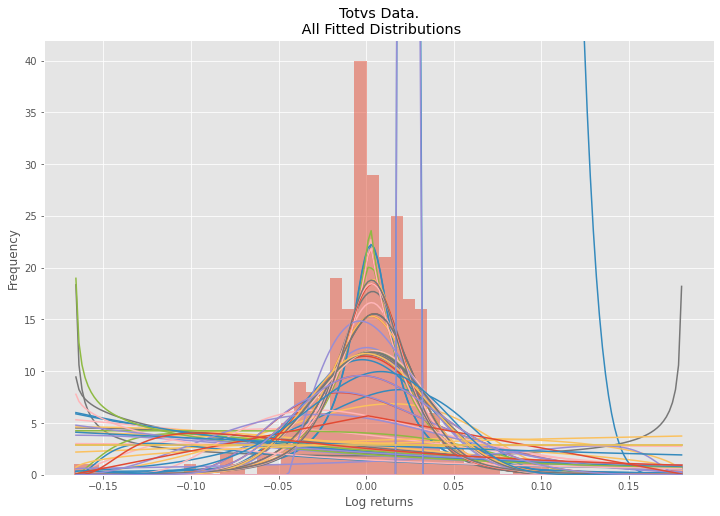

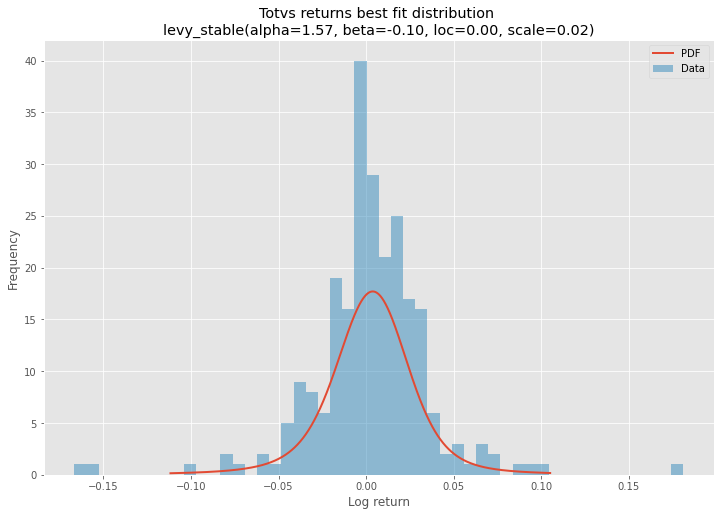

In [7]:
from src.best_fit import best_fit_distribution


# Load data from statsmodels datasets
data = log_ret['tots3'] #pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, alpha=0.5)#, normed=True, alpha=0.5)#, color=plt.rcParams['axes.color_cycle'][1])
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)



best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Totvs Data.\n All Fitted Distributions')
ax.set_xlabel(u'Log returns')
ax.set_ylabel('Frequency')

# Make PDF with best params
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)

#data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)
data.plot(kind='hist', bins=50, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Totvs returns best fit distribution \n' + dist_str)
ax.set_xlabel(u'Log return')
ax.set_ylabel('Frequency')